## import library

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.layers import Dense,GlobalAvgPool2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint





In [ ]:
!pip install tensorflow

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    strategy = tf.distribute.TPUStrategy(tpu)
    print("✅ TPU connected successfully!")
except Exception as e:
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        print("✅ GPU connected successfully!")
        strategy = tf.distribute.MirroredStrategy()
    else:
        print("⚠️ No TPU or GPU detected. Using CPU.")
        strategy = tf.distribute.get_strategy()

# ✅ Show what devices are being used
print("\nAvailable devices:")
for device in tf.config.list_logical_devices():
    print("•", device.name)
print("\nUsing strategy:", type(strategy).__name__)


✅ GPU connected successfully!

Available devices:
• /device:CPU:0
• /device:GPU:0

Using strategy: MirroredStrategy


# download data

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
abdallahalidev_plantvillage_dataset_path = kagglehub.dataset_download('abdallahalidev/plantvillage-dataset')

print('Data source import complete.')


100%|██████████| 2.04G/2.04G [00:50<00:00, 43.1MB/s]

Extracting files...


Data source import complete.


In [ ]:
data_dir = os.path.join(abdallahalidev_plantvillage_dataset_path, "plantvillage dataset",'color')


In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
img_size =(224,224)
batch_size = 32
datagen = ImageDataGenerator(
    rescale =1./255,
    validation_split = 0.2
)
train_data = datagen.flow_from_directory(
    data_dir,target_size=img_size,
    batch_size = batch_size,class_mode = "categorical",
    subset = 'training'
)
val_data = datagen.flow_from_directory(
    data_dir,target_size=img_size,
    batch_size = batch_size,class_mode = "categorical",
    subset = 'validation'
)





Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [ ]:
print("number of classes" , train_data.num_classes)
print("Name Of Classes", train_data.class_indices)

number of classes 38
Name Of Classes {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29

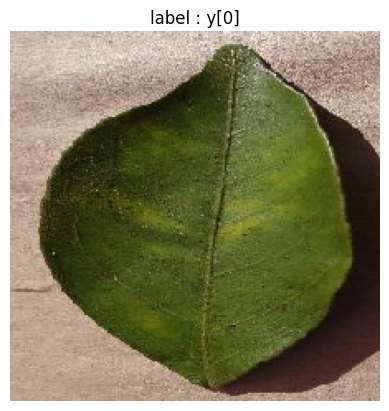

In [ ]:
x,y = next(train_data)
plt.imshow(x[0])
plt.title(f"label : y[0]")
plt.axis("off")
plt.show()

In [ ]:
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224,224,3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = base_model.output
x = GlobalAvgPool2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(train_data.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(train_data, validation_data=val_data, epochs=5)

In [ ]:
model.save("resnet50_feature_extraction.keras")
print("✅ Model saved successfully after feature extraction.")

In [ ]:
!pip install gdown

In [ ]:
import gdown

# ID الملف من رابط المشاركة
file_id = "1DnoeJHppD8dNGMM4GkLjen9fbf5gF9rZ"

# رابط مباشر للتحميل
url = f"https://drive.google.com/uc?id={file_id}"

# حمل الملف مباشرة
gdown.download(url, "resnet50_feature_extraction.keras", quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1DnoeJHppD8dNGMM4GkLjen9fbf5gF9rZ
From (redirected): https://drive.google.com/uc?id=1DnoeJHppD8dNGMM4GkLjen9fbf5gF9rZ&confirm=t&uuid=84e25c63-277a-4e32-90a5-d3acd789d625
To: /content/resnet50_feature_extraction.keras
100%|██████████| 97.2M/97.2M [00:00<00:00, 251MB/s]


'resnet50_feature_extraction.keras'

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/resnet50_feature_extraction.keras")
print("✅ Loaded model for fine-tuning.")

✅ Loaded model for fine-tuning.


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 190 variables whereas the saved optimizer has 119 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
from tensorflow.keras.optimizers import AdamW



for layer in model.layers[-75:]:
    layer.trainable = True

optimizer = AdamW(learning_rate=1e-5, weight_decay=1e-4)

model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 299s 192ms/step - accuracy: 0.3181 - loss: 3.1794 - val_accuracy: 0.5435 - val_loss: 1.6434
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 260s 192ms/step - accuracy: 0.5522 - loss: 1.6031 - val_accuracy: 0.6579 - val_loss: 1.2116
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 258s 190ms/step - accuracy: 0.6446 - loss: 1.2504 - val_accuracy: 0.6398 - val_loss: 1.2874
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 258s 190ms/step - accuracy: 0.7073 - loss: 1.0096 - val_accuracy: 0.6833 - val_loss: 1.0717
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 259s 190ms/step - accuracy: 0.7547 - loss: 0.8450 - val_accuracy: 0.7498 - val_loss: 0.8629
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 258s 190ms/step - accuracy: 0.7855 - loss: 0.7149 - val_accuracy: 0.7968 - val_loss: 0.6810
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 262s 190ms/step - accuracy: 0.8177 - loss: 0.6186 - val_accuracy: 0.8241 - val_loss: 0.5880
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 259s 191ms/step - ac

In [ ]:
for layer in base_model.layers[-75:]:
  layer.trainable = True
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history_finetune  = model.fit(train_data, validation_data=val_data, epochs=10)

In [ ]:
model.save("best_model_resnet50.keras")

In [ ]:
loss,acc = model.evaluate(val_data)
print(f"val_loss : {loss} , val_acc : {acc}")

In [ ]:


checkpoint = ModelCheckpoint(
    "best_model_resnet50.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

# Fine-tuning
for layer in base_model.layers[-75:]:
    layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[checkpoint]
)


In [ ]:
loss,acc = model.evaluate(val_data)
print(f"val_loss : {loss} , val_acc : {acc}")

In [ ]:
model.save("best_model_resnet50.keras")

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()

In [ ]:
# base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224,224,3))
# for layer in base_model.layers:
#     layer.trainable = False
# x = base_model.output
# x = GlobalAvgPool2D()(x)
# x = Dense(256, activation="relu")(x)
# x = Dropout(0.5)(x)
# predictions = Dense(train_data.num_classes, activation="softmax")(x)

# model = Model(inputs=base_model.input, outputs=predictions)
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
#               loss="categorical_crossentropy",
#               metrics=["accuracy"])
# history = model.fit(train_data, validation_data=val_data, epochs=5)